# Pandas Pt.2

Data 2: https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv

Data 3: https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 632.0+ bytes


In [4]:
data

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [5]:
data['ST_NUM'].isna()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [6]:
data['NUM_BEDROOMS'].isna()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

In [7]:
missing_values = ['--', 'na', 'n/a', 'none']

data = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv", na_values=missing_values)

In [8]:
data

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [9]:
data['NUM_BEDROOMS'].isna()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7     True
8     True
Name: NUM_BEDROOMS, dtype: bool

In [10]:
data.index

RangeIndex(start=0, stop=9, step=1)

In [11]:
index = 0
for row in data['OWN_OCCUPIED']:
    try:
        print(int(row))
        data.loc[index, 'OWN_OCCUPIED'] = np.nan
    except ValueError:
        pass
    index += 1

12


In [12]:
data

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [13]:
index = 0
for row in data['NUM_BATH']:
    try:
        float(row)
    except ValueError:
        data.loc[index, 'NUM_BATH'] = np.nan
        pass
    index += 1

In [14]:
data

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [15]:
data.isna().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        2
SQ_FT           2
dtype: int64

In [16]:
data.isna().sum().sum()

13

In [17]:
data['ST_NUM'].fillna(125)

0    104.0
1    197.0
2    125.0
3    201.0
4    203.0
5    207.0
6    125.0
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [18]:
data.loc[6, 'ST_NUM'] = 125

In [19]:
data['ST_NUM'].fillna(125, inplace=True)

In [20]:
data

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [21]:
# data['NUM_BEDROOMS'].median()
data['NUM_BEDROOMS'].fillna(data['NUM_BEDROOMS'].median(),inplace=True)

In [22]:
data['OWN_OCCUPIED'].fillna('Y')

0    Y
1    N
2    N
3    Y
4    Y
5    Y
6    Y
7    Y
8    Y
Name: OWN_OCCUPIED, dtype: object

In [23]:
data

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


In [24]:
data['OWN_OCCUPIED'].fillna('Y', inplace=True)


In [25]:
data['SQ_FT'].fillna(data['SQ_FT'].mean(), inplace=True)

In [26]:
data

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,1100.0
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,Y,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,Y,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,1100.0
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


# Excel File

In [27]:
data_xls = pd.ExcelFile('data/obes.xls')

In [29]:
data_xls.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [30]:
data_age = data_xls.parse(u'7.2', skiprows=4, skipfooter=14)

In [31]:
data_age

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [32]:
data_age.rename(columns={'Unnamed: 0': 'Year'}, inplace=True)

In [33]:
data_age.dropna(axis=0, inplace=True)

In [34]:
data_age.set_index('Year', inplace=True)

In [35]:
data_age

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


<AxesSubplot:xlabel='Year'>

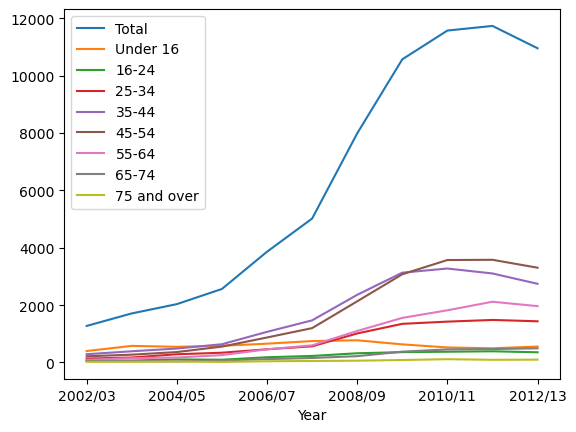

In [36]:
data_age.plot()

<AxesSubplot:xlabel='Year'>

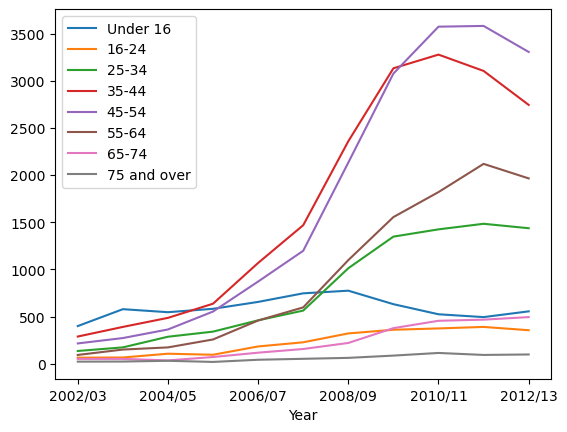

In [37]:
data_age.drop('Total', axis=1).plot()

<AxesSubplot:xlabel='Year'>

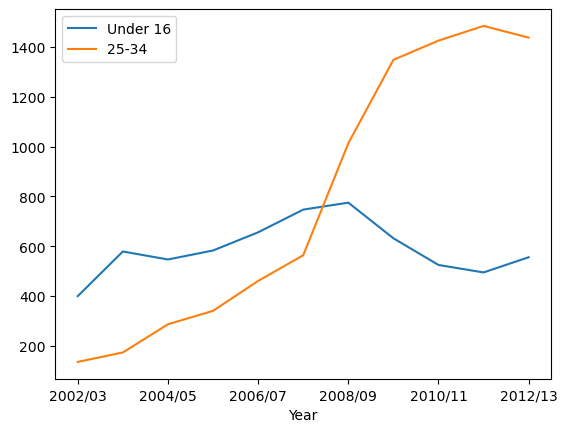

In [38]:
data_age['Under 16'].plot(label="Under 16", legend=True)
data_age['25-34'].plot(label="25-34", legend=True)

# Timeseries

In [39]:
from datetime import datetime

In [40]:
date_range = pd.date_range(start='2022-01-01', end='2022-01-08', freq='H',)

In [41]:
date_range

DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 01:00:00',
               '2022-01-01 02:00:00', '2022-01-01 03:00:00',
               '2022-01-01 04:00:00', '2022-01-01 05:00:00',
               '2022-01-01 06:00:00', '2022-01-01 07:00:00',
               '2022-01-01 08:00:00', '2022-01-01 09:00:00',
               ...
               '2022-01-07 15:00:00', '2022-01-07 16:00:00',
               '2022-01-07 17:00:00', '2022-01-07 18:00:00',
               '2022-01-07 19:00:00', '2022-01-07 20:00:00',
               '2022-01-07 21:00:00', '2022-01-07 22:00:00',
               '2022-01-07 23:00:00', '2022-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [42]:
data_ts = pd.DataFrame(date_range, columns=['datetime'])

In [43]:
data_ts['value'] = np.random.randint(0,100, size=len(date_range))

In [44]:
data_ts

,datetime,value
0,2022-01-01 00:00:00,11
1,2022-01-01 01:00:00,56
2,2022-01-01 02:00:00,70
3,2022-01-01 03:00:00,68
4,2022-01-01 04:00:00,47
...,...,...
164,2022-01-07 20:00:00,38
165,2022-01-07 21:00:00,55
166,2022-01-07 22:00:00,71
167,2022-01-07 23:00:00,22


In [45]:
data_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  169 non-null    datetime64[ns]
 1   value     169 non-null    int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 2.1 KB


In [46]:
data_ts.set_index("datetime", inplace=True)

In [47]:
data_ts

,value
datetime,
2022-01-01 00:00:00,11
2022-01-01 01:00:00,56
2022-01-01 02:00:00,70
2022-01-01 03:00:00,68
2022-01-01 04:00:00,47
...,...
2022-01-07 20:00:00,38
2022-01-07 21:00:00,55
2022-01-07 22:00:00,71


In [48]:
str_date_range = [str(x) for x in date_range]

In [49]:
str_date_range

['2022-01-01 00:00:00',
 '2022-01-01 01:00:00',
 '2022-01-01 02:00:00',
 '2022-01-01 03:00:00',
 '2022-01-01 04:00:00',
 '2022-01-01 05:00:00',
 '2022-01-01 06:00:00',
 '2022-01-01 07:00:00',
 '2022-01-01 08:00:00',
 '2022-01-01 09:00:00',
 '2022-01-01 10:00:00',
 '2022-01-01 11:00:00',
 '2022-01-01 12:00:00',
 '2022-01-01 13:00:00',
 '2022-01-01 14:00:00',
 '2022-01-01 15:00:00',
 '2022-01-01 16:00:00',
 '2022-01-01 17:00:00',
 '2022-01-01 18:00:00',
 '2022-01-01 19:00:00',
 '2022-01-01 20:00:00',
 '2022-01-01 21:00:00',
 '2022-01-01 22:00:00',
 '2022-01-01 23:00:00',
 '2022-01-02 00:00:00',
 '2022-01-02 01:00:00',
 '2022-01-02 02:00:00',
 '2022-01-02 03:00:00',
 '2022-01-02 04:00:00',
 '2022-01-02 05:00:00',
 '2022-01-02 06:00:00',
 '2022-01-02 07:00:00',
 '2022-01-02 08:00:00',
 '2022-01-02 09:00:00',
 '2022-01-02 10:00:00',
 '2022-01-02 11:00:00',
 '2022-01-02 12:00:00',
 '2022-01-02 13:00:00',
 '2022-01-02 14:00:00',
 '2022-01-02 15:00:00',
 '2022-01-02 16:00:00',
 '2022-01-02 17:

In [50]:
pd.to_datetime(str_date_range,infer_datetime_format=True)

DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 01:00:00',
               '2022-01-01 02:00:00', '2022-01-01 03:00:00',
               '2022-01-01 04:00:00', '2022-01-01 05:00:00',
               '2022-01-01 06:00:00', '2022-01-01 07:00:00',
               '2022-01-01 08:00:00', '2022-01-01 09:00:00',
               ...
               '2022-01-07 15:00:00', '2022-01-07 16:00:00',
               '2022-01-07 17:00:00', '2022-01-07 18:00:00',
               '2022-01-07 19:00:00', '2022-01-07 20:00:00',
               '2022-01-07 21:00:00', '2022-01-07 22:00:00',
               '2022-01-07 23:00:00', '2022-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq=None)

In [51]:
str_date = ['June-01-2022', 'June-02-2022', 'June-03-2022']
date_time_list = [datetime.strptime(d, '%B-%d-%Y') for d in str_date]

In [52]:
date_time_list

[datetime.datetime(2022, 6, 1, 0, 0),
 datetime.datetime(2022, 6, 2, 0, 0),
 datetime.datetime(2022, 6, 3, 0, 0)]

In [53]:
pd.DataFrame(date_time_list, columns=['date'])

,date
0,2022-06-01
1,2022-06-02
2,2022-06-03


In [54]:
data_ts[data_ts.index.day == 2]

,value
datetime,
2022-01-02 00:00:00,76
2022-01-02 01:00:00,27
2022-01-02 02:00:00,79
2022-01-02 03:00:00,11
2022-01-02 04:00:00,30
2022-01-02 05:00:00,2
2022-01-02 06:00:00,11
2022-01-02 07:00:00,34
2022-01-02 08:00:00,51


In [55]:
data_ts.loc['2022-01-02']

,value
datetime,
2022-01-02 00:00:00,76
2022-01-02 01:00:00,27
2022-01-02 02:00:00,79
2022-01-02 03:00:00,11
2022-01-02 04:00:00,30
2022-01-02 05:00:00,2
2022-01-02 06:00:00,11
2022-01-02 07:00:00,34
2022-01-02 08:00:00,51


In [56]:
data_ts.loc['2022-01-02':'2022-01-04']


,value
datetime,
2022-01-02 00:00:00,76
2022-01-02 01:00:00,27
2022-01-02 02:00:00,79
2022-01-02 03:00:00,11
2022-01-02 04:00:00,30
...,...
2022-01-04 19:00:00,72
2022-01-04 20:00:00,85
2022-01-04 21:00:00,78


In [57]:
data_ts.resample('D').mean()

,value
datetime,
2022-01-01,58.833333
2022-01-02,47.291667
2022-01-03,36.125000
2022-01-04,52.208333
2022-01-05,51.416667
2022-01-06,45.000000
2022-01-07,48.291667
2022-01-08,60.000000


In [58]:
data_ts['cummalative'] = data_ts.rolling(3).sum()

In [59]:
data_ts['moving_average'] = data_ts['value'].rolling(3).mean()

In [60]:
data_ts['moving_average_filled'] = data_ts['moving_average'].fillna(method='backfill')

In [61]:
data_ts

,value,cummalative,moving_average,moving_average_filled
datetime,,,,
2022-01-01 00:00:00,11,NaN,NaN,45.666667
2022-01-01 01:00:00,56,NaN,NaN,45.666667
2022-01-01 02:00:00,70,137.0,45.666667,45.666667
2022-01-01 03:00:00,68,194.0,64.666667,64.666667
2022-01-01 04:00:00,47,185.0,61.666667,61.666667
...,...,...,...,...
2022-01-07 20:00:00,38,180.0,60.000000,60.000000
2022-01-07 21:00:00,55,192.0,64.000000,64.000000
2022-01-07 22:00:00,71,164.0,54.666667,54.666667


<AxesSubplot:xlabel='datetime'>

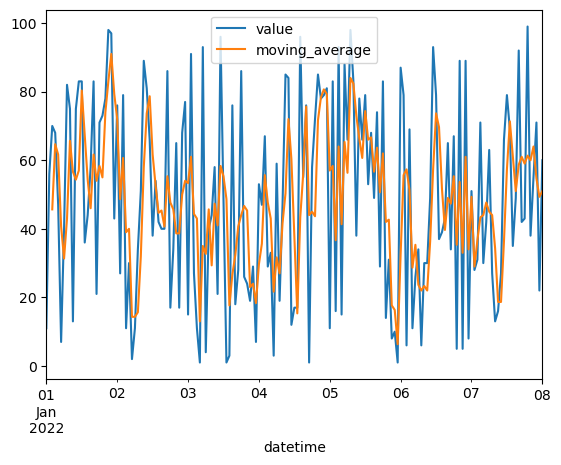

In [62]:
data_ts['value'].plot(label="value", legend=True)
data_ts['moving_average'].plot(label="moving_average", legend=True)


Data : https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv

In [63]:
data_energy = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv"
                          ,index_col=0
                          ,parse_dates=True)

In [64]:
data_energy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
dtypes: float64(4)
memory usage: 171.2 KB


In [65]:
data_energy['year'] = data_energy.index.year
data_energy['month'] = data_energy.index.month
data_energy['weekday'] = data_energy.index.weekday

In [66]:
data_energy

,Consumption,Wind,Solar,Wind+Solar,year,month,weekday
Date,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,3
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,2
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,3
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,4


In [67]:
data_energy.loc['2017-10-03']

Consumption    1176.7697
Wind            459.1350
Solar            79.5530
Wind+Solar      538.6880
year           2017.0000
month            10.0000
weekday           1.0000
Name: 2017-10-03 00:00:00, dtype: float64

In [68]:
data_energy.loc['2017-03-01':'2017-03-31']


,Consumption,Wind,Solar,Wind+Solar,year,month,weekday
Date,,,,,,,
2017-03-01,1551.410,463.541,55.172,518.713,2017,3,2
2017-03-02,1541.733,640.792,79.159,719.951,2017,3,3
2017-03-03,1514.114,323.879,94.663,418.542,2017,3,4
2017-03-04,1265.589,253.254,99.949,353.203,2017,3,5
2017-03-05,1185.541,375.785,75.046,450.831,2017,3,6
2017-03-06,1519.850,244.779,52.157,296.936,2017,3,0
2017-03-07,1554.860,98.963,41.359,140.322,2017,3,1
2017-03-08,1565.245,362.636,53.960,416.596,2017,3,2
2017-03-09,1545.066,348.595,48.426,397.021,2017,3,3


<AxesSubplot:xlabel='Date'>

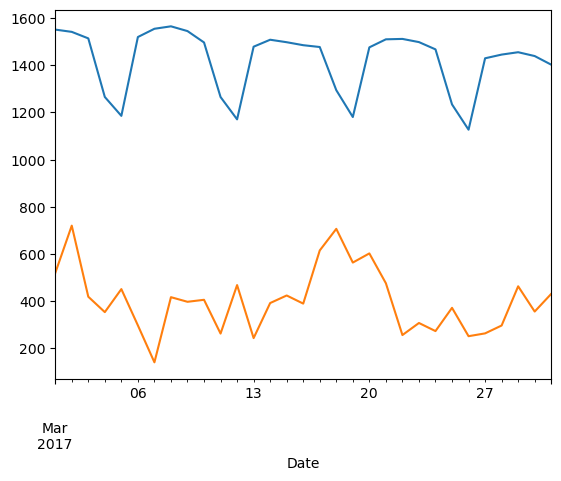

In [69]:
data_energy.loc['2017-03-01':'2017-03-31',"Consumption"].plot()
data_energy.loc['2017-03-01':'2017-03-31',"Wind+Solar"].plot()

# 

In [70]:
data_energy.loc['2017-03']

,Consumption,Wind,Solar,Wind+Solar,year,month,weekday
Date,,,,,,,
2017-03-01,1551.410,463.541,55.172,518.713,2017,3,2
2017-03-02,1541.733,640.792,79.159,719.951,2017,3,3
2017-03-03,1514.114,323.879,94.663,418.542,2017,3,4
2017-03-04,1265.589,253.254,99.949,353.203,2017,3,5
2017-03-05,1185.541,375.785,75.046,450.831,2017,3,6
2017-03-06,1519.850,244.779,52.157,296.936,2017,3,0
2017-03-07,1554.860,98.963,41.359,140.322,2017,3,1
2017-03-08,1565.245,362.636,53.960,416.596,2017,3,2
2017-03-09,1545.066,348.595,48.426,397.021,2017,3,3


<AxesSubplot:xlabel='Date'>

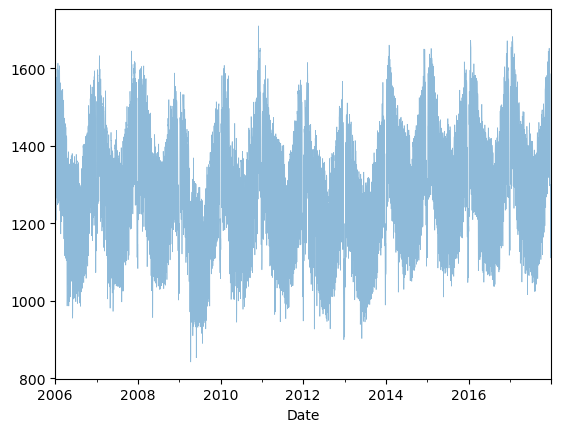

In [71]:
data_energy['Consumption'].plot(linewidth=.5,alpha=.5)

<AxesSubplot:xlabel='Date'>

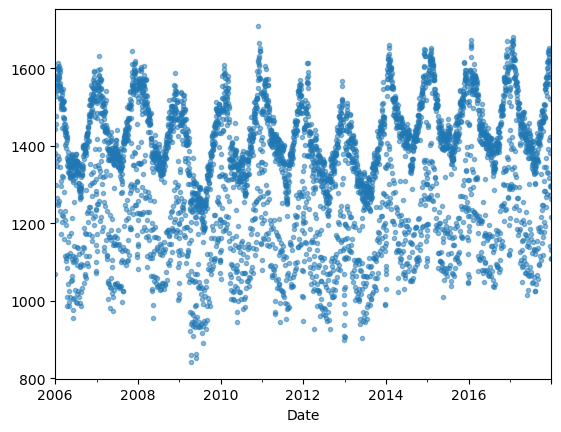

In [72]:
data_energy['Consumption'].plot(marker='.',alpha=.5,linestyle='None')

<AxesSubplot:xlabel='Date'>

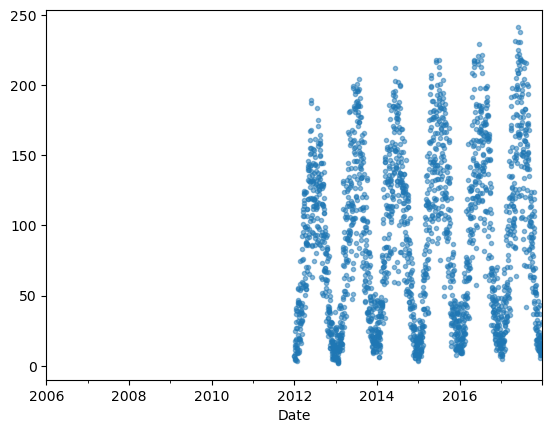

In [73]:
data_energy['Solar'].plot(marker='.',alpha=.5,linestyle='None')


<AxesSubplot:xlabel='Date'>

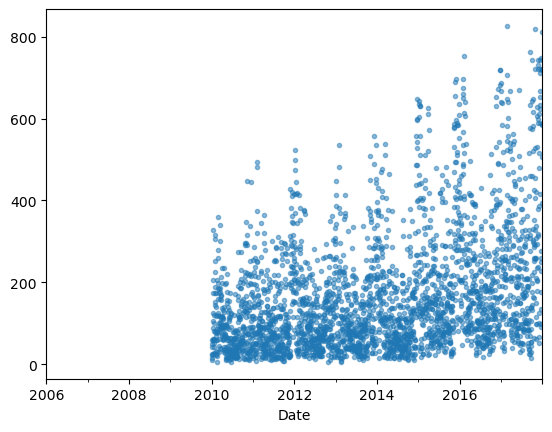

In [74]:
data_energy['Wind'].plot(marker='.',alpha=.5,linestyle='None')


Text(0, 0.5, 'Electricity consumption in GWh')

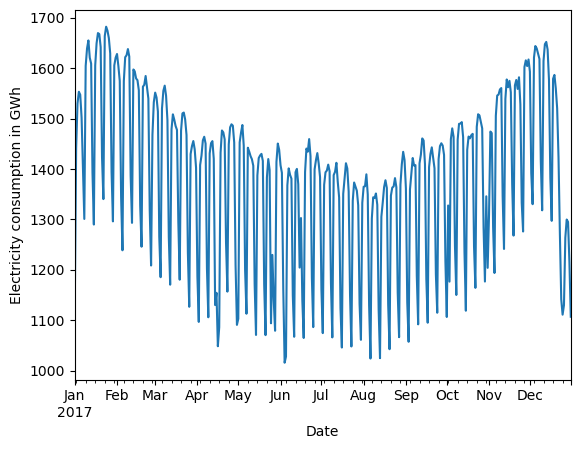

In [75]:
ax = data_energy.loc['2017', 'Consumption'].plot()
ax.set_ylabel("Electricity consumption in GWh")

Text(0, 0.5, 'Electricity consumption in GWh')

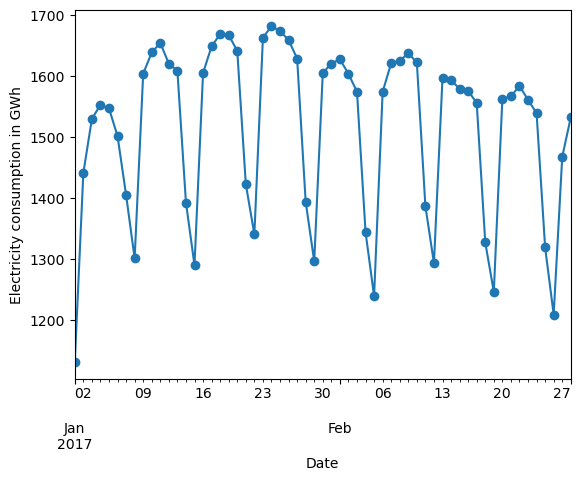

In [76]:
ax = data_energy.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o',linestyle='-')
ax.set_ylabel("Electricity consumption in GWh")

<AxesSubplot:title={'center':'Consumption'}, xlabel='month'>

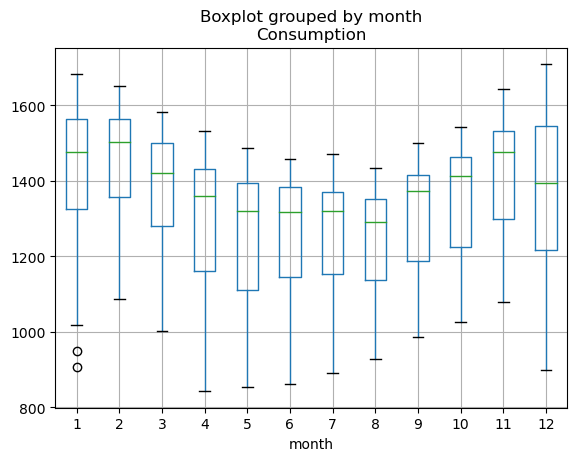

In [77]:
data_energy.boxplot(column=['Consumption'], by='month')

<AxesSubplot:title={'center':'Solar'}, xlabel='month'>

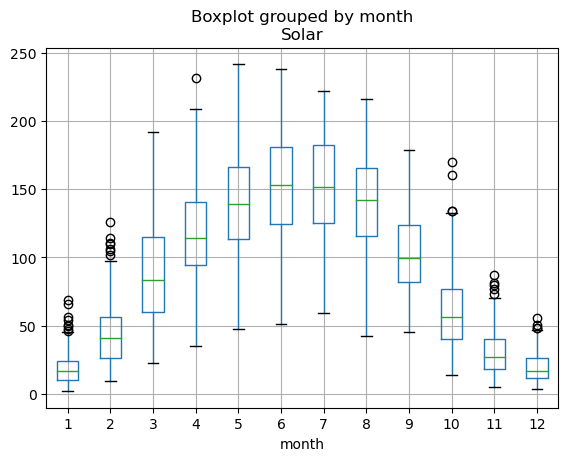

In [78]:
data_energy.boxplot(column=['Solar'], by='month')


<AxesSubplot:title={'center':'Consumption'}, xlabel='month'>

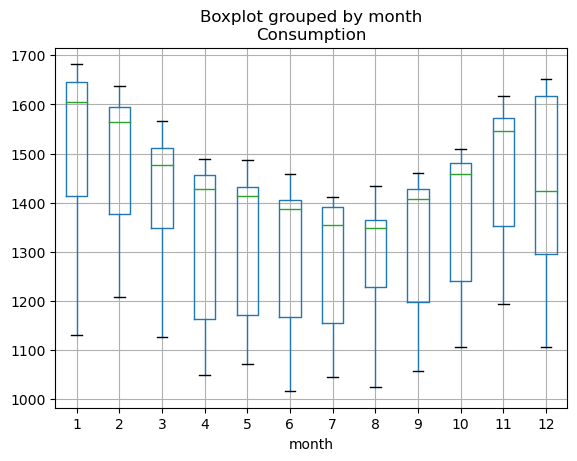

In [79]:
data_energy.loc['2017'].boxplot(column=['Consumption'], by='month')

<AxesSubplot:title={'center':'Wind'}, xlabel='month'>

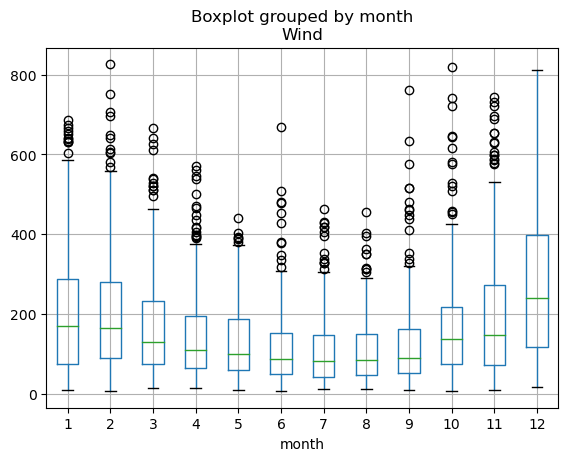

In [80]:
data_energy.boxplot(column=['Wind'], by='month')

<AxesSubplot:title={'center':'Consumption'}, xlabel='year'>

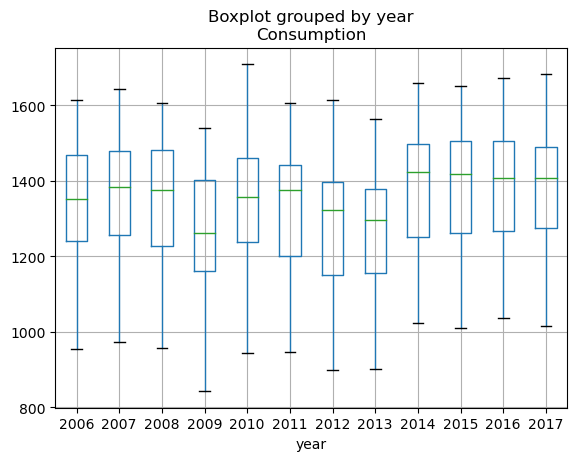

In [81]:
data_energy.boxplot(column=['Consumption'], by='year')


In [82]:
columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
energy_weekly = data_energy[columns].resample('W').mean()

In [83]:
energy_weekly

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN
...,...,...,...,...
2017-12-03,1536.236314,284.334286,18.320857,302.655143
2017-12-10,1554.824946,636.514714,16.440286,652.955000
2017-12-17,1543.856889,442.531857,18.143714,460.675571


<AxesSubplot:xlabel='Date'>

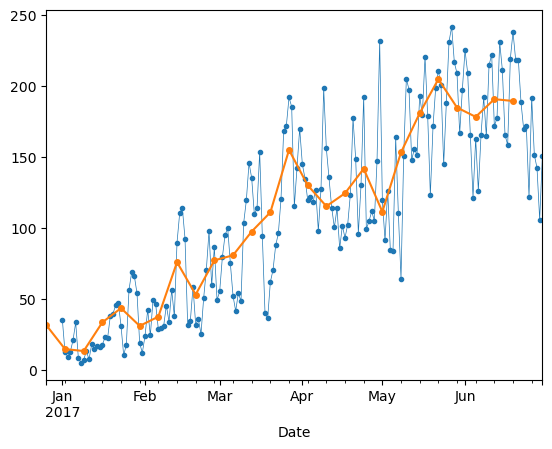

In [84]:
start, end = '2017-01' , '2017-6'

data_energy.loc[start:end, "Solar"].plot(marker='.', linestyle='-', linewidth=0.5)
energy_weekly.loc[start:end, 'Solar'].plot(marker='.', linestyle='-', markersize=8)

In [85]:
# pd.Series([100, 230, 400, np.nan,10000]).median()
data_energy['Consumption_MA7'] = data_energy['Consumption'].rolling(7).mean()

<AxesSubplot:xlabel='Date'>

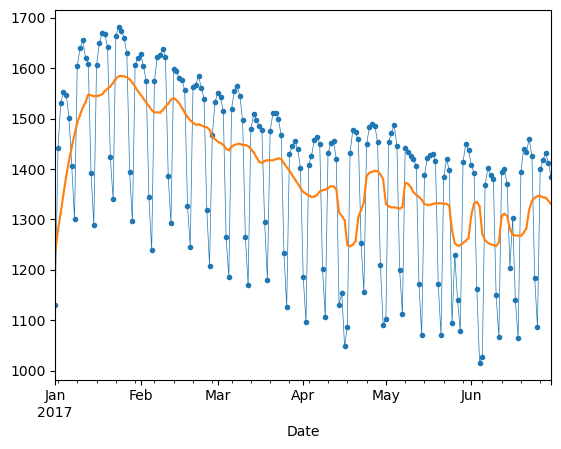

In [86]:
data_energy.loc[start:end, "Consumption"].plot(marker='.', linestyle='-', linewidth=0.5)
data_energy.loc[start:end, 'Consumption_MA7'].plot(marker='.', linestyle='-',markersize=0.5)